In [93]:
import itertools
import matplotlib.pyplot as plt

import cv2
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential

In [94]:
model = load_model(os.path.join("Models", "Only_Real_Average.keras"))

In [95]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 127, 127, 16)   │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 62, 62, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 30, 30, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,092,190 (42.31 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,394,794 (28.21 MB)

In [96]:
# Trained intermediate layers.
intermediate_layers = model.layers[:5]

In [97]:
intermediate_model = Sequential(intermediate_layers)
intermediate_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 127, 127, 16)   │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 62, 62, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,712 (37.94 KB)

 Trainable params: 9,712 (37.94 KB)

 Non-trainable params: 0 (0.00 B)

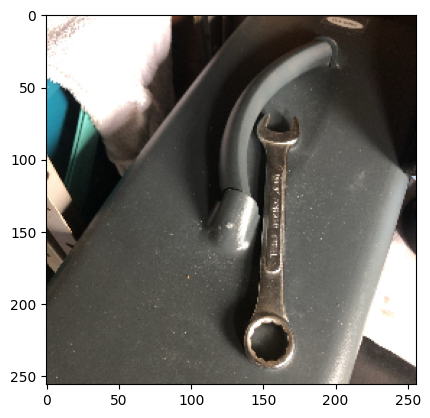

In [98]:
# Loading the image.
# image = cv2.imread("Data/Synthetic/CombWrench/1_img.jpg")
image = cv2.imread("Data/Real/CombWrench/IMG_0599.JPEG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resize = cv2.resize(image, (256,256))

plt.imshow(resize)
plt.show()

In [99]:
yhat = intermediate_model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


IndexError: index 16 is out of bounds for axis 3 with size 16

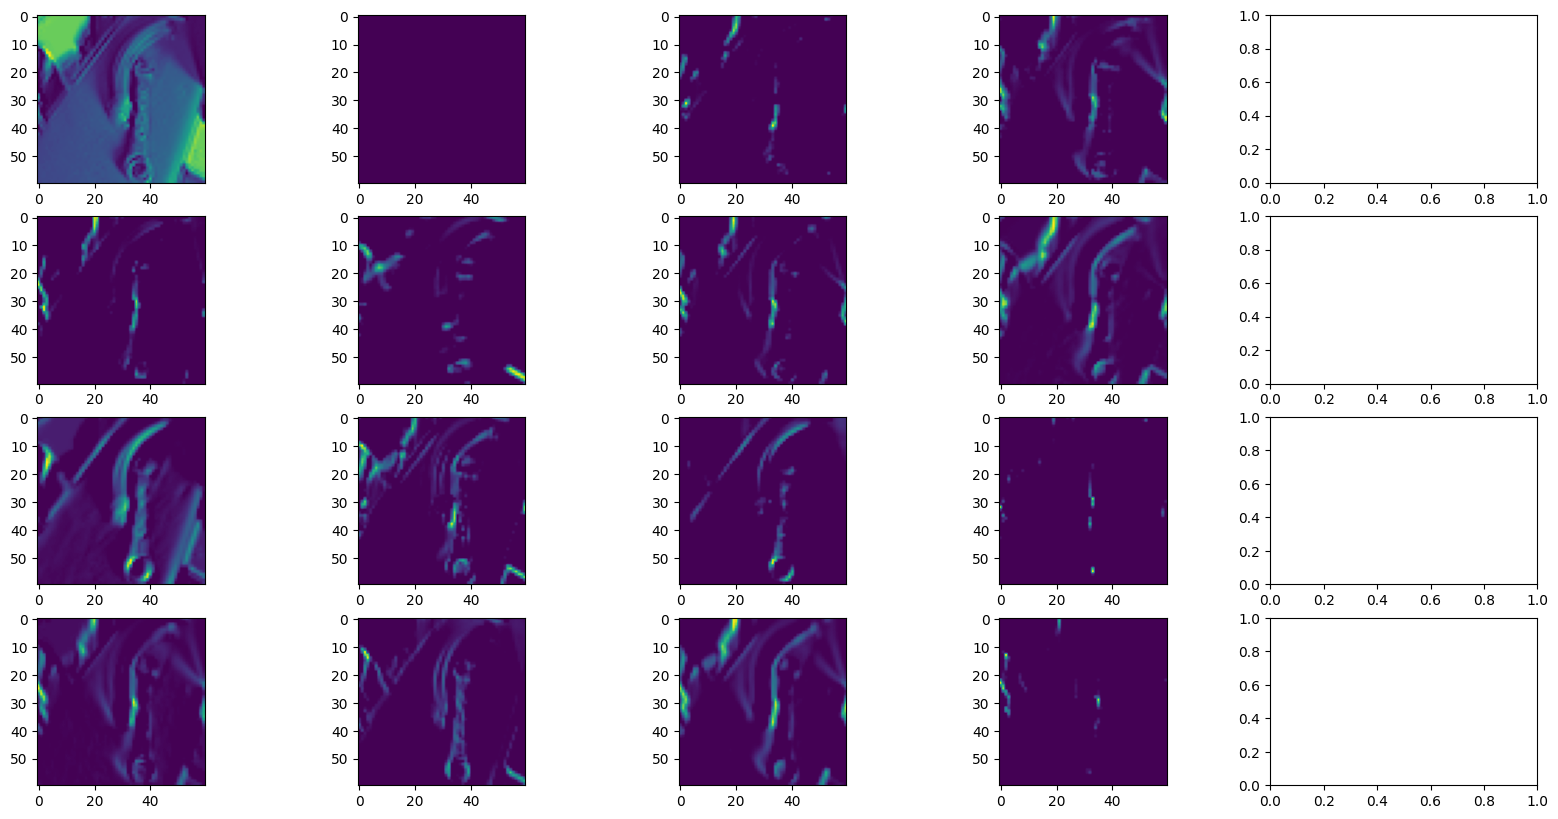

In [100]:
# Visualization Grid.
num_rows = 4
num_cols = 5

fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20,10))
for idx, ax_idx in enumerate(list(itertools.product(range(num_cols), range(num_rows)))):
    ax[ax_idx[1], ax_idx[0]].imshow(yhat[0, :, :, idx])